In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% of women who are all survived:", rate_women)

% of women who are all survived: 0.7420382165605095


In [5]:
men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% of men who are all survived:", rate_men)

% of men who are all survived: 0.18890814558058924


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train['Age'].fillna(train['Age'].median(),inplace=True)
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [10]:
train['Embarked'].replace('nan',np.nan,inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [11]:
test['Embarked'].replace('nan',np.nan,inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

In [12]:
train['Fare'] = train['Fare'].replace(0, train['Fare'].median())

In [13]:
test['Fare'].replace('nan',np.nan,inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Fare')

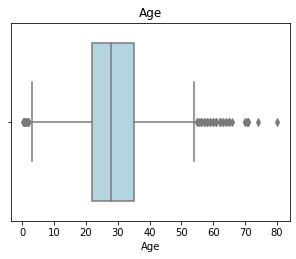

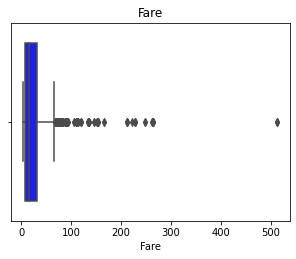

In [16]:
plt.figure(figsize= (5,8))
plt.subplot(2,1,1)
sns.boxplot(x= train.Age, color='lightblue')
plt.title('Age')

plt.figure(figsize= (5,8))
plt.subplot(2,1,2)
sns.boxplot(x= train.Fare, color='blue')
plt.title('Fare')

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [18]:
lrApps,urApps=remove_outlier(train['Age'])
train['Age']=np.where(train['Age']>urApps,urApps,train['Age'])
train['Age']=np.where(train['Age']<lrApps,lrApps,train['Age'])

lrApps,urApps=remove_outlier(train['Fare'])
train['Fare']=np.where(train['Fare']>urApps,urApps,train['Fare'])
train['Fare']=np.where(train['Fare']<lrApps,lrApps,train['Fare'])

Text(0.5, 1.0, 'Fare')

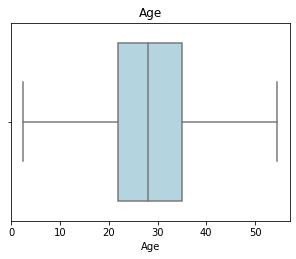

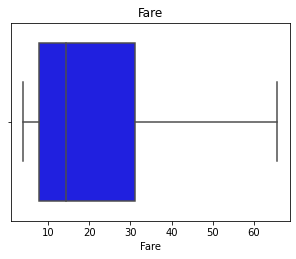

In [19]:
plt.figure(figsize= (5,8))
plt.subplot(2,1,1)
sns.boxplot(x= train.Age, color='lightblue')
plt.title('Age')

plt.figure(figsize= (5,8))
plt.subplot(2,1,2)
sns.boxplot(x= train.Fare, color='blue')
plt.title('Fare')

Text(0.5, 1.0, 'Fare')

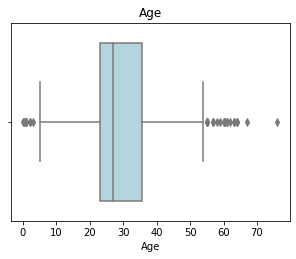

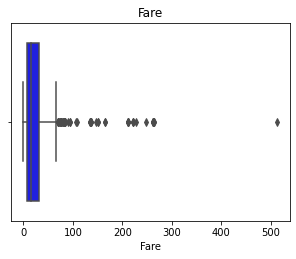

In [20]:
plt.figure(figsize= (5,8))
plt.subplot(2,1,1)
sns.boxplot(x= test.Age, color='lightblue')
plt.title('Age')

plt.figure(figsize= (5,8))
plt.subplot(2,1,2)
sns.boxplot(x= test.Fare, color='blue')
plt.title('Fare')

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
lrApps,urApps=remove_outlier(test['Age'])
test['Age']=np.where(test['Age']>urApps,urApps,test['Age'])
test['Age']=np.where(test['Age']<lrApps,lrApps,test['Age'])

lrApps,urApps=remove_outlier(test['Fare'])
test['Fare']=np.where(test['Fare']>urApps,urApps,test['Fare'])
test['Fare']=np.where(test['Fare']<lrApps,lrApps,test['Fare'])

Text(0.5, 1.0, 'Fare')

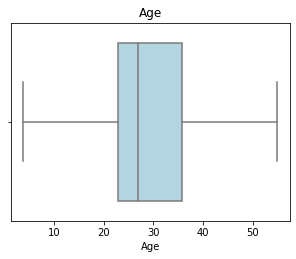

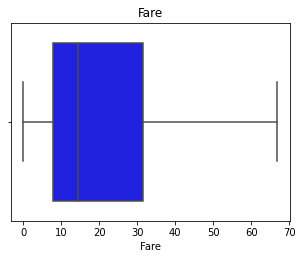

In [23]:
plt.figure(figsize= (5,8))
plt.subplot(2,1,1)
sns.boxplot(x= test.Age, color='lightblue')
plt.title('Age')

plt.figure(figsize= (5,8))
plt.subplot(2,1,2)
sns.boxplot(x= test.Fare, color='blue')
plt.title('Fare')

In [24]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [26]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% of women who are all survived:", rate_women)

% of women who are all survived: 0.7420382165605095


In [27]:
men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% of men who are all survived:", rate_men)

% of men who are all survived: 0.18890814558058924


In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [29]:
y_train = train['Survived']

features = ["Pclass","Sex", "SibSp", "Parch"]

X_train = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.02

In [30]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Sex,1.352866
2,Name,-0.043983
1,Pclass,-0.228536
0,Survived,-0.921927
4,Age,-1.352855
5,SibSp,NaN
6,Parch,NaN
7,Ticket,NaN
8,Fare,NaN
9,Cabin,NaN


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

80.7

In [32]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

80.02

In [33]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

81.71

In [34]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

81.71

In [35]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,81.71
4,Decision Tree,81.71
0,KNN,80.70
1,Logistic Regression,80.02
3,Naive Bayes,80.02


In [36]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [37]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

77.33

In [38]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

80.58

In [39]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

79.35

In [40]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

80.02

In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,81.71
8,Decision Tree,81.71
1,KNN,80.70
0,Support Vector Machines,80.58
2,Logistic Regression,80.02
4,Naive Bayes,80.02
6,Stochastic Gradient Decent,80.02
7,Linear SVC,79.35
5,Perceptron,77.33


In [42]:
from sklearn.ensemble import RandomForestClassifier
y = train['Survived']

features = ["Pclass","Sex", "SibSp", "Parch"]

X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators = 500, max_depth = 6, random_state=0)
model.fit(X,y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
